In [3]:
# Research questions
# Are there groups of coffee shops based on size, local traffic, and hours?
# Do these groups benefit differently from marketing spend?

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

In [5]:
coffee=pd.read_csv('coffee_shop_revenue.csv')

In [6]:
coffee.rename(columns={'Number_of_Customers_Per_Day': 'Customers', 'Average_Order_Value': 'Order', 'Operating_Hours_Per_Day': 'Hours', 'Number_of_Employees': 'Employees', 'Marketing_Spend_Per_Day': 'Marketing', 'Location_Foot_Traffic': 'Traffic', 'Daily_Revenue': 'Revenue'}, inplace=True)
print(coffee)

      Customers  Order  Hours  Employees  Marketing  Traffic  Revenue
0           152   6.74     14          4     106.62       97  1547.81
1           485   4.50     12          8      57.83      744  2084.68
2           398   9.09      6          6      91.76      636  3118.39
3           320   8.48     17          4     462.63      770  2912.20
4           156   7.44     17          2     412.52      232  1663.42
...         ...    ...    ...        ...        ...      ...      ...
1995        372   6.41     11          4     466.11      913  2816.85
1996        105   3.01     11          7      12.62      235   337.97
1997         89   5.28     16          9     376.64      310   951.34
1998        403   9.41      7         12     452.49      577  4266.21
1999         89   6.88     13         14      78.46      322   914.24

[2000 rows x 7 columns]


In [7]:
# Check on characteristics of dataset.
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Customers  2000 non-null   int64  
 1   Order      2000 non-null   float64
 2   Hours      2000 non-null   int64  
 3   Employees  2000 non-null   int64  
 4   Marketing  2000 non-null   float64
 5   Traffic    2000 non-null   int64  
 6   Revenue    2000 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 109.5 KB


In [8]:
# Check on missing values.
missing_values=coffee.isnull().sum()
missing_values

Customers    0
Order        0
Hours        0
Employees    0
Marketing    0
Traffic      0
Revenue      0
dtype: int64

In [9]:
correlation_matrix=coffee.corr(method='spearman')
correlation_matrix

,Customers,Order,Hours,Employees,Marketing,Traffic,Revenue
Customers,1.000000,-0.014640,-0.000548,0.000234,0.027216,-0.000989,0.751988
Order,-0.014640,1.000000,-0.016621,0.010852,0.019729,0.017450,0.515663
Hours,-0.000548,-0.016621,1.000000,-0.030340,0.019644,0.014904,-0.005695
Employees,0.000234,0.010852,-0.030340,1.000000,0.026757,-0.041735,-0.000293
Marketing,0.027216,0.019729,0.019644,0.026757,1.000000,-0.012289,0.252762
Traffic,-0.000989,0.017450,0.014904,-0.041735,-0.012289,1.000000,0.013800
Revenue,0.751988,0.515663,-0.005695,-0.000293,0.252762,0.013800,1.000000


<Axes: >

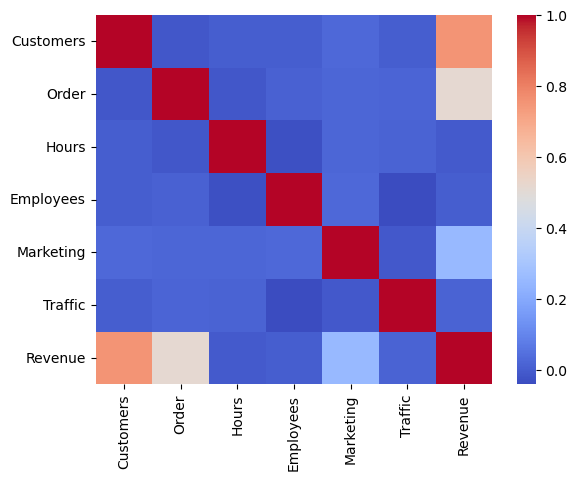

In [10]:
sns.heatmap(correlation_matrix, cmap='coolwarm')

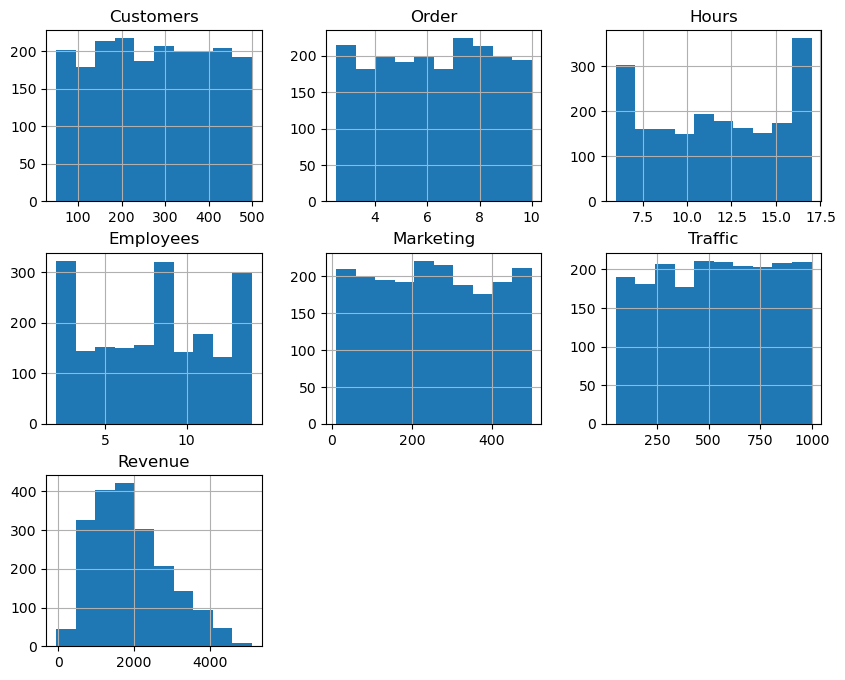

In [11]:
coffee.hist(figsize=(10, 8))  
plt.show()

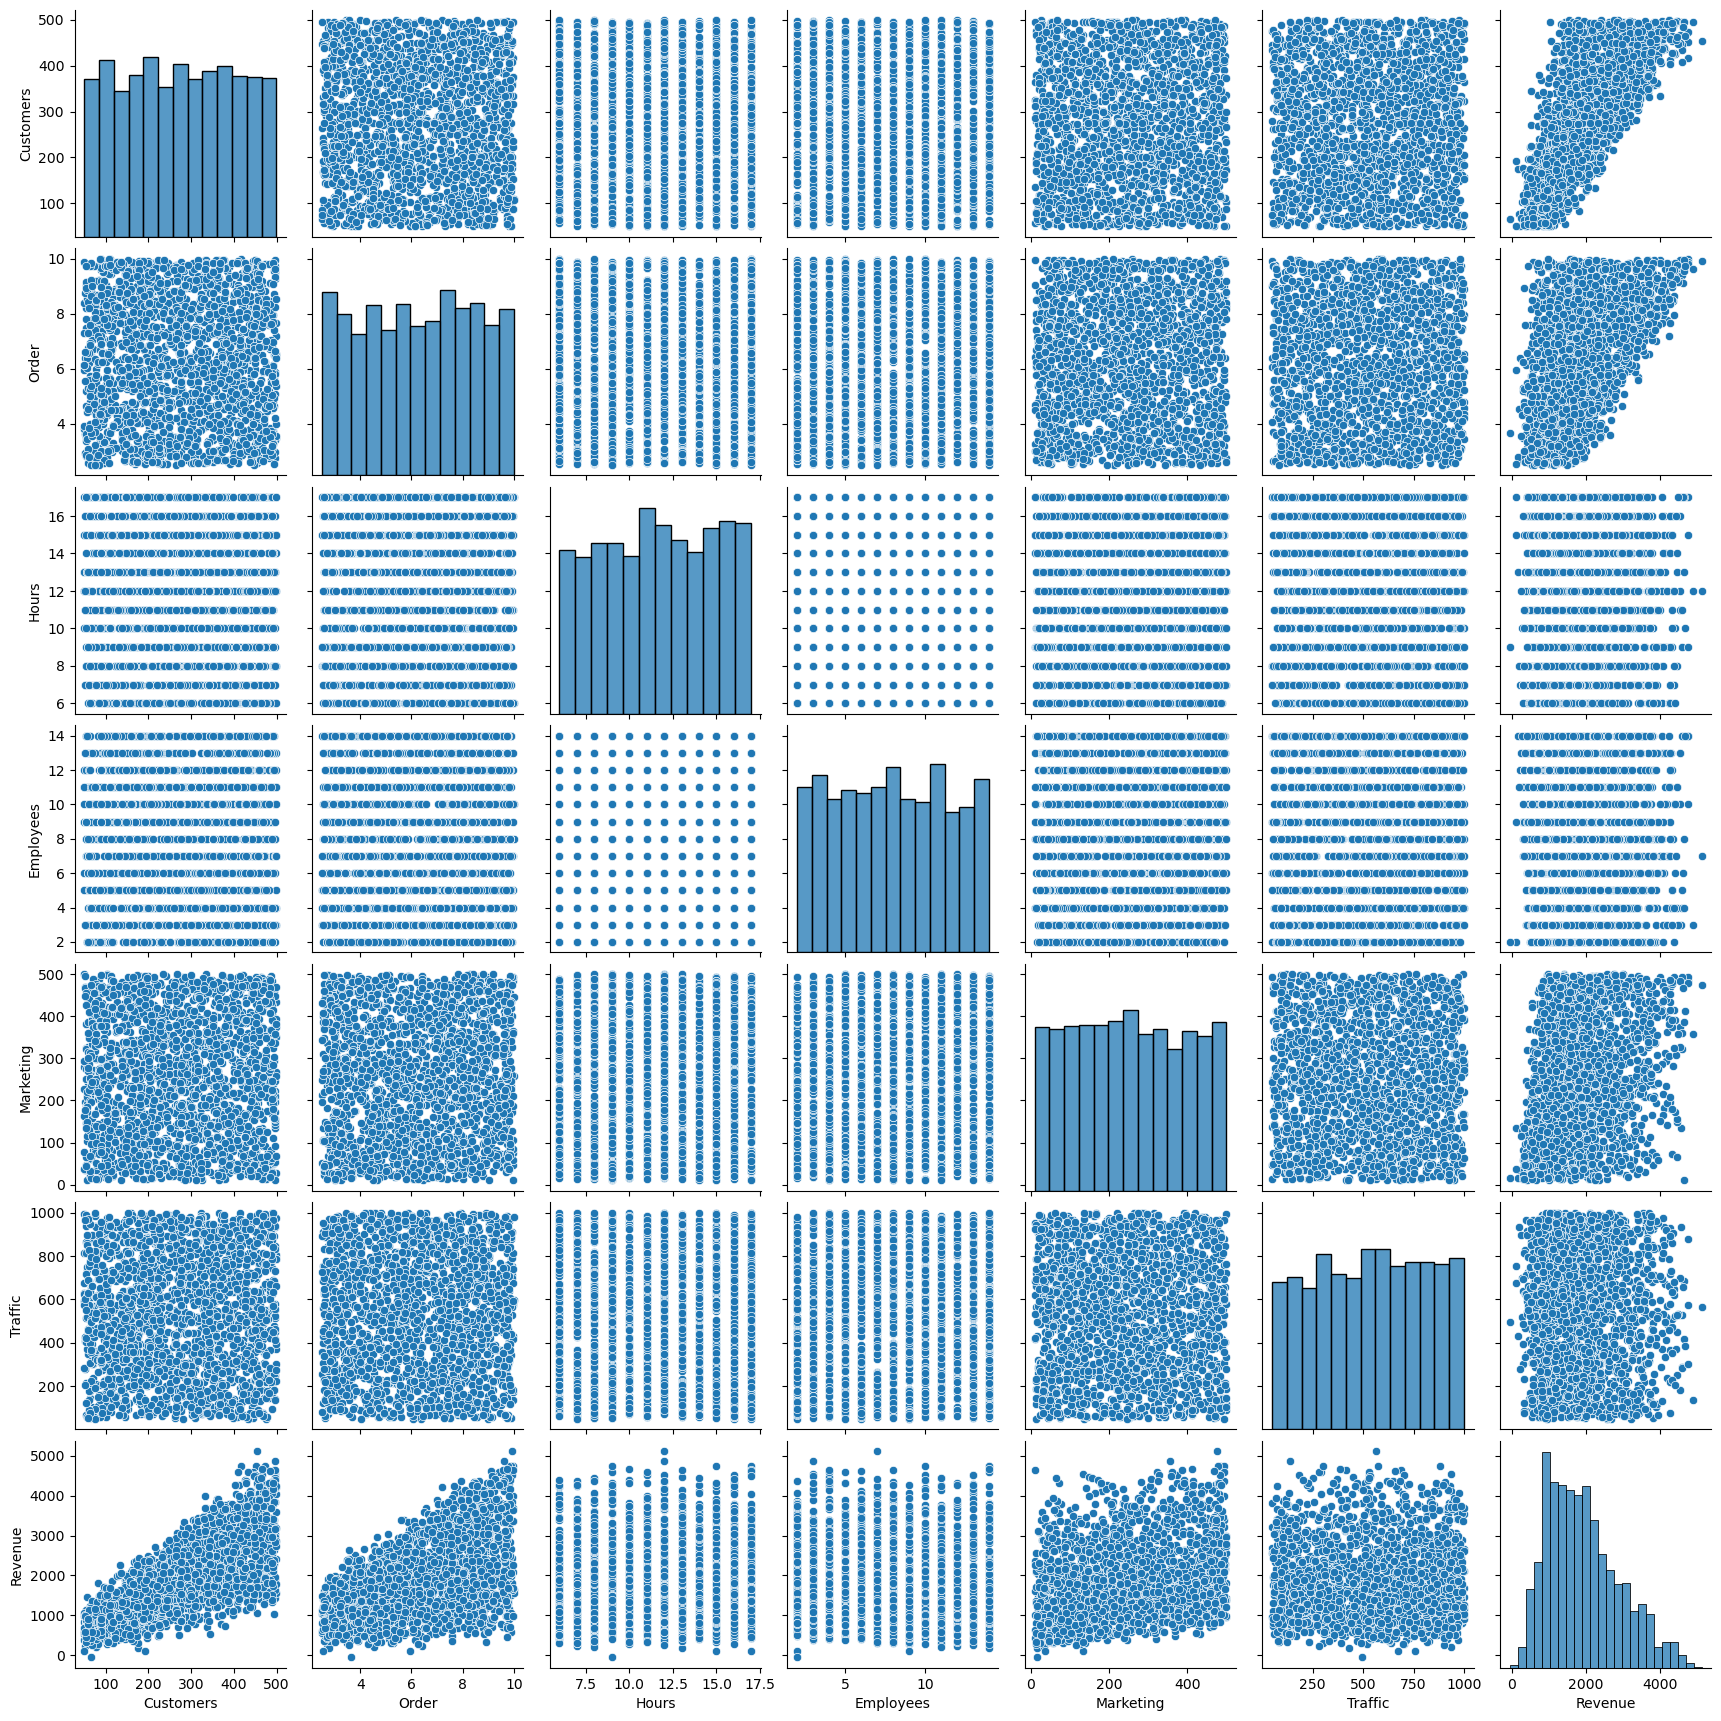

In [12]:
sns.pairplot(coffee)
plt.show()

In [13]:
scaler = StandardScaler()

shop = scaler.fit_transform(coffee[['Customers','Order', 'Hours', 'Employees', 'Traffic']])

scaler = StandardScaler()

scaler_df = scaler.fit_transform(coffee[['Customers', 'Order', 'Hours', 'Employees', 'Traffic']])

# Convert the NumPy array to a DataFrame
shop = pd.DataFrame(scaler_df, columns=['Customers', 'Order', 'Hours', 'Employees', 'Traffic'])

# Now you can use describe() on the DataFrame
shop.describe()


,Customers,Order,Hours,Employees,Traffic
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03
mean,5.506706e-17,1.154632e-17,7.283063e-17,-1.243450e-17,-6.394885e-17
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00
min,-1.733226e+00,-1.729065e+00,-1.648463e+00,-1.589562e+00,-1.785359e+00
25%,-8.523017e-01,-8.510206e-01,-7.757986e-01,-7.876979e-01,-8.575049e-01
50%,5.440092e-03,1.782982e-02,9.686574e-02,1.416627e-02,1.880194e-02
75%,8.631819e-01,8.545006e-01,9.695301e-01,8.160304e-01,8.546072e-01
max,1.736379e+00,1.718754e+00,1.551306e+00,1.617895e+00,1.708822e+00


In [14]:
shop.rename(columns={'Customers': 'Customers_scaled', 'Order': 'Order_scaled', 'Hours': 'Hours_scaled', 'Employees': 'Employees_scaled', 'Traffic':'Traffic_scaled'}, inplace=True)


C:\Users\fh1808mi\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\fh1808mi\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\fh1808mi\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\fh1808mi\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.p

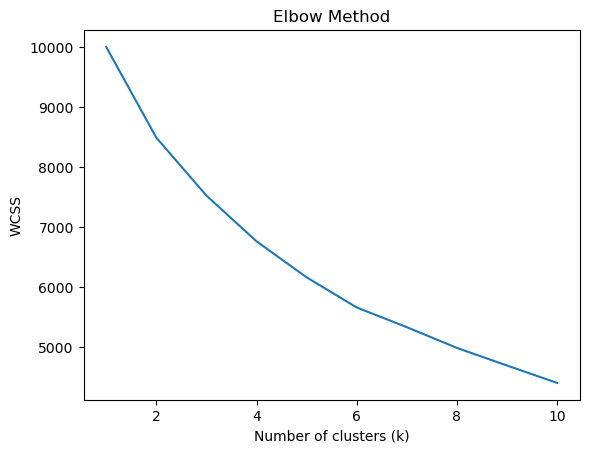

In [15]:
wcss = [] # Within-cluster sum of squares
for i in range(1, 11): # Test k from 1 to 10
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(shop)
        wcss.append(kmeans.inertia_)
    
# Plot the elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

C:\Users\fh1808mi\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\fh1808mi\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\fh1808mi\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\fh1808mi\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.p

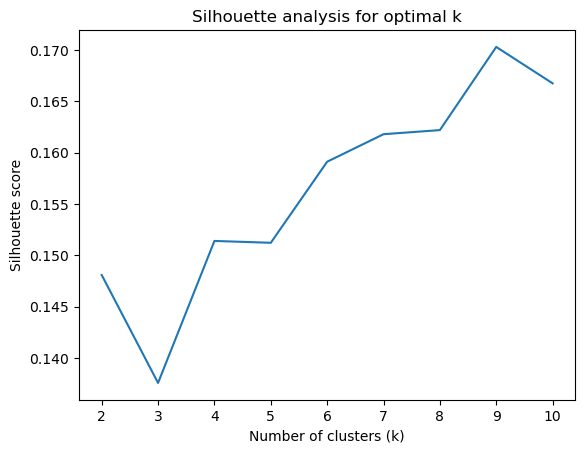

In [16]:
silhouette_scores = []
k_range = range(2, 11)  # Test cluster numbers from 2 to 10

for k in k_range:

    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(shop)
    silhouette_avg = silhouette_score(shop, labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(k_range, silhouette_scores)
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette score")
plt.title("Silhouette analysis for optimal k")
plt.show()

In [17]:
coffee = coffee.reset_index(drop=True)
shop = shop.reset_index(drop=True)

result = pd.concat([coffee, shop], axis=1)
result.describe()


,Customers,Order,Hours,Employees,Marketing,Traffic,Revenue,Customers_scaled,Order_scaled,Hours_scaled,Employees_scaled,Traffic_scaled
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03
mean,274.296000,6.261215,11.667000,7.947000,252.614160,534.893500,1917.325940,5.506706e-17,1.154632e-17,7.283063e-17,-1.243450e-17,-6.394885e-17
std,129.441933,2.175832,3.438608,3.742218,141.136004,271.662295,976.202746,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00
min,50.000000,2.500000,6.000000,2.000000,10.120000,50.000000,-58.950000,-1.733226e+00,-1.729065e+00,-1.648463e+00,-1.589562e+00,-1.785359e+00
25%,164.000000,4.410000,9.000000,5.000000,130.125000,302.000000,1140.085000,-8.523017e-01,-8.510206e-01,-7.757986e-01,-7.876979e-01,-8.575049e-01
50%,275.000000,6.300000,12.000000,8.000000,250.995000,540.000000,1770.775000,5.440092e-03,1.782982e-02,9.686574e-02,1.416627e-02,1.880194e-02
75%,386.000000,8.120000,15.000000,11.000000,375.352500,767.000000,2530.455000,8.631819e-01,8.545006e-01,9.695301e-01,8.160304e-01,8.546072e-01
max,499.000000,10.000000,17.000000,14.000000,499.740000,999.000000,5114.600000,1.736379e+00,1.718754e+00,1.551306e+00,1.617895e+00,1.708822e+00


In [18]:
# Initialize and fit the K-means model
kmeans = KMeans(n_clusters=9, random_state=42, n_init='auto') 
kmeans.fit(shop)

# Get cluster assignments for each data point
clusters = kmeans.labels_

# Add cluster assignments to the original dataframe
result['cluster'] = clusters


C:\Users\fh1808mi\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


In [19]:
result.describe()

,Customers,Order,Hours,Employees,Marketing,Traffic,Revenue,Customers_scaled,Order_scaled,Hours_scaled,Employees_scaled,Traffic_scaled,cluster
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2000.000000
mean,274.296000,6.261215,11.667000,7.947000,252.614160,534.893500,1917.325940,5.506706e-17,1.154632e-17,7.283063e-17,-1.243450e-17,-6.394885e-17,4.028500
std,129.441933,2.175832,3.438608,3.742218,141.136004,271.662295,976.202746,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,2.556943
min,50.000000,2.500000,6.000000,2.000000,10.120000,50.000000,-58.950000,-1.733226e+00,-1.729065e+00,-1.648463e+00,-1.589562e+00,-1.785359e+00,0.000000
25%,164.000000,4.410000,9.000000,5.000000,130.125000,302.000000,1140.085000,-8.523017e-01,-8.510206e-01,-7.757986e-01,-7.876979e-01,-8.575049e-01,2.000000
50%,275.000000,6.300000,12.000000,8.000000,250.995000,540.000000,1770.775000,5.440092e-03,1.782982e-02,9.686574e-02,1.416627e-02,1.880194e-02,4.000000
75%,386.000000,8.120000,15.000000,11.000000,375.352500,767.000000,2530.455000,8.631819e-01,8.545006e-01,9.695301e-01,8.160304e-01,8.546072e-01,6.000000
max,499.000000,10.000000,17.000000,14.000000,499.740000,999.000000,5114.600000,1.736379e+00,1.718754e+00,1.551306e+00,1.617895e+00,1.708822e+00,8.000000


In [20]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customers         2000 non-null   int64  
 1   Order             2000 non-null   float64
 2   Hours             2000 non-null   int64  
 3   Employees         2000 non-null   int64  
 4   Marketing         2000 non-null   float64
 5   Traffic           2000 non-null   int64  
 6   Revenue           2000 non-null   float64
 7   Customers_scaled  2000 non-null   float64
 8   Order_scaled      2000 non-null   float64
 9   Hours_scaled      2000 non-null   float64
 10  Employees_scaled  2000 non-null   float64
 11  Traffic_scaled    2000 non-null   float64
 12  cluster           2000 non-null   int32  
dtypes: float64(8), int32(1), int64(4)
memory usage: 195.4 KB


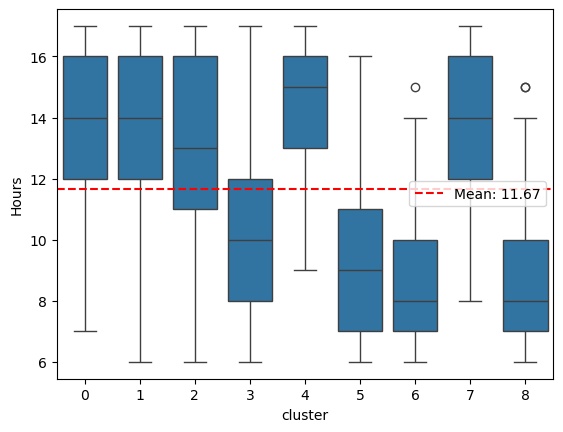

In [21]:
sns.boxplot(x="cluster", y="Hours", data=result)

mean_value = result['Hours'].mean()

plt.axhline(y=mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')

plt.legend()

plt.show()


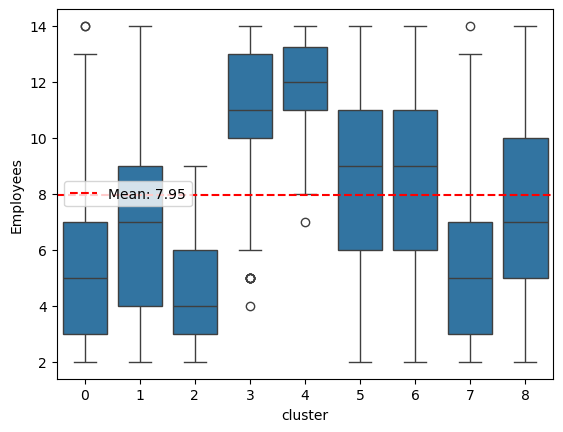

In [22]:
sns.boxplot(x="cluster", y="Employees", data=result)

mean_value = result['Employees'].mean()

plt.axhline(y=mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')

plt.legend()

plt.show()



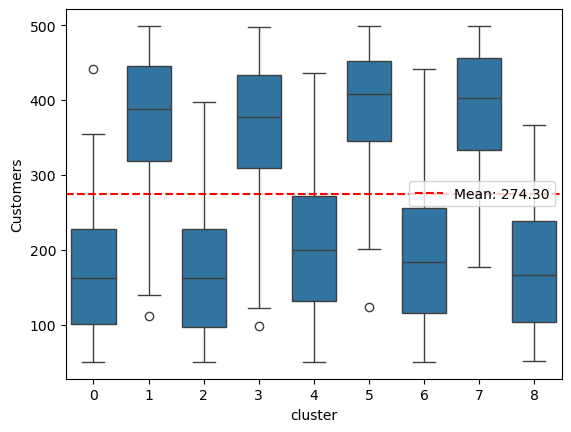

In [23]:
sns.boxplot(x="cluster", y="Customers", data=result)

mean_value = result['Customers'].mean()

# Add a horizontal line at the mean value
plt.axhline(y=mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')

# Optionally, add a legend
plt.legend()

# Show the plot
plt.show()



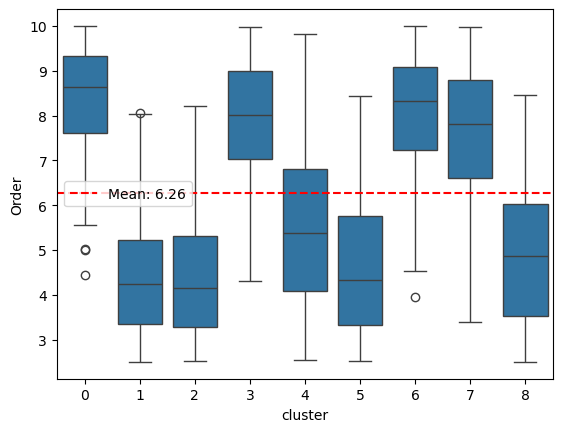

In [24]:
sns.boxplot(x="cluster", y="Order", data=result)

mean_value = result['Order'].mean()

# Add a horizontal line at the mean value
plt.axhline(y=mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')

# Optionally, add a legend
plt.legend()

# Show the plot
plt.show()


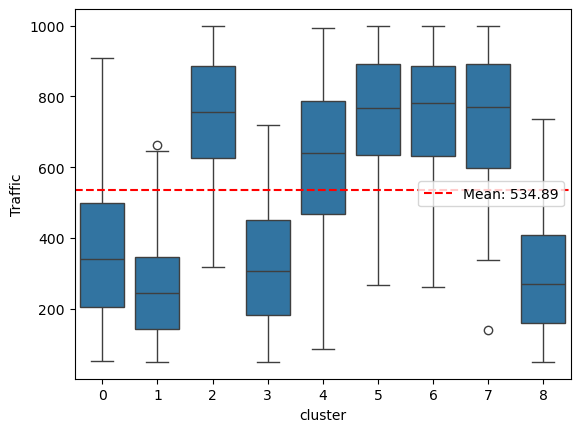

In [55]:
sns.boxplot(x="cluster", y="Traffic", data=result)

mean_value = result['Traffic'].mean()

# Add a horizontal line at the mean value
plt.axhline(y=mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')

# Optionally, add a legend
plt.legend()

# Show the plot
plt.show()


In [25]:
means_pivot = result.pivot_table(values=['Customers', 'Order', 'Hours', 'Employees', 'Traffic'], index='cluster', aggfunc='mean')
print("\nMeans by Category (using pivot_table()):\n", means_pivot)


Means by Category (using pivot_table()):
           Customers  Employees      Hours     Order     Traffic
cluster                                                        
0        172.798165   5.472477  13.857798  8.366651  361.160550
1        374.362445   6.729258  13.475983  4.387293  260.628821
2        168.790698   4.540698  13.122093  4.348721  753.093023
3        365.627049  11.094262  10.172131  7.834139  324.143443
4        205.396154  11.873077  14.342308  5.449846  626.030769
5        393.262136   8.713592   9.043689  4.595340  752.082524
6        191.688889   8.560000   8.497778  8.089689  754.480000
7        392.161017   5.453390  13.737288  7.677161  734.745763
8        175.490476   7.509524   8.295238  4.946238  294.723810


In [26]:
# Cluster 0: Few employees, high hours, low traffic (The Optimist)
# Cluster 1: Low employees, Medium hours, high traffic (The Morning Rush)
# Cluster 2: Low employees, medium hours, low traffic (The 9 to 5)
# Cluster 3: High employees, medium hours, High traffic (High touch)
# cluster 4: High employees, high hours, low traffic (Downtown base)
# cluster 5: High employees, high hours, high traffic (The boutique)
# cluster 6: Low emloyees, High hours, high traffic (Exhausted)

In [27]:
counts = result['cluster'].value_counts()
print(counts)

cluster
4    260
3    244
7    236
1    229
6    225
0    218
8    210
5    206
2    172
Name: count, dtype: int64


In [28]:
import statsmodels.api as sm
import pandas as pd

# Fit separate models
model_A = sm.OLS(result[result['cluster'] == 0]['Revenue'], sm.add_constant(result[result['cluster']== 0]['Marketing'])).fit()
model_B = sm.OLS(result[result['cluster'] == 1]['Revenue'], sm.add_constant(result[result['cluster']== 1]['Marketing'])).fit()
model_C = sm.OLS(result[result['cluster'] == 2]['Revenue'], sm.add_constant(result[result['cluster']== 2]['Marketing'])).fit()
model_D = sm.OLS(result[result['cluster'] == 3]['Revenue'], sm.add_constant(result[result['cluster']== 3]['Marketing'])).fit()
model_E = sm.OLS(result[result['cluster'] == 4]['Revenue'], sm.add_constant(result[result['cluster']== 4]['Marketing'])).fit()
model_F = sm.OLS(result[result['cluster'] == 5]['Revenue'], sm.add_constant(result[result['cluster']== 5]['Marketing'])).fit()
model_G = sm.OLS(result[result['cluster'] == 6]['Revenue'], sm.add_constant(result[result['cluster']== 6]['Marketing'])).fit()
model_H = sm.OLS(result[result['cluster'] == 7]['Revenue'], sm.add_constant(result[result['cluster']== 7]['Marketing'])).fit()
model_I = sm.OLS(result[result['cluster'] == 8]['Revenue'], sm.add_constant(result[result['cluster']== 8]['Marketing'])).fit()

# Print model summaries
print("Model A Summary:")
print(model_A.summary())
print("Model B Summary:")
print(model_B.summary())
print("Model C Summary:")
print(model_C.summary())
print("Model D Summary:")
print(model_D.summary())
print("Model E Summary:")
print(model_E.summary())
print("Model F Summary:")
print(model_F.summary())
print("Model G Summary:")
print(model_G.summary())
print("Model H Summary:")
print(model_H.summary())


Model A Summary:
                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     8.636
Date:                Wed, 05 Mar 2025   Prob (F-statistic):            0.00365
Time:                        10:54:47   Log-Likelihood:                -1735.0
No. Observations:                 218   AIC:                             3474.
Df Residuals:                     216   BIC:                             3481.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1454.4886     96.819   